<a href="https://colab.research.google.com/github/JuaniRain/ProyectoFinal.JuanRainoldi/blob/main/ProyectoFinalJuanRainoldi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tiempo de ejecución 4:04

In [ ]:
#Se crea la variable de cuando empieza a correr el código y otra de cuando se termina de correr todo el código, luego se realizará la diferencia entre ambos
#valores para que el profesor sepa cunato tiempo tardo en correr el código
import datetime

startrun=datetime.datetime.now()

## Objetivos

En este caso, se deberá entregar el Proyecto Final. Para lo cual se entrenarán y optimizarán diversos modelos de machine learning para resolver una problemática específica, la cual ha sido detectada en la instancia de entrega anterior. Los objetivos de este trabajo son:


1.   Abstracto con motivación y audiencia:  Descripción de alto nivel de lo que motiva a analizar los datos elegidos y audiencia que se podría beneficiar de este análisis.
2.   Preguntas/Problema que buscamos resolver: Si bien puede haber más de una problemática a resolver, la problemática principal debe encuadrarse como un problema de clasificación o regresión.
3.   Breve Análisis Exploratorio de Datos (EDA): Análisis descriptivo de los datos mediante visualizaciones y herramientas estadísticas, análisis de valores faltantes.
4.   Ingeniería de atributos: Creación de nuevas variables, transformación de variables existentes (i.e normalización de variables, encoding, etc.).
5.   Entrenamiento y Testeo: Entrenamiento y testeo de al menos 2 modelos distintos de Machine Learning utilizando algún método de validación cruzada.
6.   Optimización: Utilizar alguna técnica de optimización de hiperparámetros (e.g gridsearch, randomizedsearch, etc.).
7.   Selección de modelos: utilizar las métricas apropiadas para la selección del mejor modelo (e.g AUC, MSE, etc.).



## Introducción

**Contexto Empresarial:** En el contexto de una institución financiera, como un banco o una compañía de préstamos, se desea automatizar y mejorar el proceso de evaluación crediticia de los solicitantes. Para lograrlo, se decide utilizar técnicas de aprendizaje automático y construir un modelo capaz de clasificar automáticamente a una persona que solicite un crédito.

**Problema empresarial:** Su tareas es procesar la base de datos brindada con la cual se realizará el modelo. Se deberán realizar visualizaciones y resúmenes numéricos para responder a la pregunta planteada en contexto empresarial.

**Contexto analítico:** Se proporciona un archivo CSV ("test.csv"), el cual contiene información detallada sobre el historial bancario de diversos clientes como ingreso mensual, número de cuentas bancarias, monto adeudado, etc. Se empleará esta base de datos para poder realizar estimaciones acerca de la idoneidad de un cliente para recibir un crédito, basándose en su historial bancario. En este dataset, los datos están etiquetados; es decir, hay una variable que dice calidad del cliente a la hora de afrontar una deuda. Por lo que, se deberá utilizar modelos de clasificación para abordar este problema de aprendizaje supervisado.


In [ ]:
# Importar librerías

# Operaciones básicas
import pandas as pd
import numpy as np

# Visualizacion de Datos
import matplotlib.pyplot as plt
import seaborn as sns

##Se carga el data set

In [ ]:
creditos=pd.read_csv('https://raw.githubusercontent.com/JuaniRain/Base-datos-Coder/main/test.csv')
print(creditos.shape)
display(creditos.head())

(50000, 27)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


## Detalle de cada columna

ID: Representa el número de identificación de una entrada

Customer_ID: Representa el código único de identificación de cada cliente

Month: Represente el mes del año

Name: Representa el nombre del cliente

Age: Representa la edad del cliente

SSN: Representa el número de seguridad social de cada cliente

Occupation: Representa la profesión del cliente

Annual_Income: Representa el ingreso anual del cliente

Monthly_Inhand_Salary: Representa el ingreso mensual del cliente

Num_Bank_Accounts: Representa el número de cuentas bancarias que tiene el cliente

Num_Credit_Card: Representa el número de tarjetas de créditos que tiene el cliente

Interest_Rate: Representa la tasa de interés de la tarjeta de crédito

Num_of_Loan: Representa el número de préstamos tomados del banco

Type_of_Loan: Representa el tipo de préstamo tomado por cliente

Delay_from_due_date: Representa el número promedio de días de retraso desde la fecha de pago

Num_of_Delayed_Payment: Representa el número promedio de pagos demorado por cliente

Changed_Credit_Limit: Representa el cambio porcentual en el límite de la tarjeta de crédito

Num_Credit_Inquiries: Representa el número de consultas de tarjetas de créditos

Credit_Mix: Representa la clasificación del cliente frente a la combinación de créditos.

Outstanding_Debt: Representa la deuda restante por pagar (en USD)

Credit_Utilization_Ratio: Representa el índice de la utilización de la tarjeta de crédito.

Credit_History_Age: Representa la historia de créditos en años de la persona

Payment_of_Min_Amount: Representa si la persona realizó el pago del monto mínimo. Donde Yes significa que ha realizado el pago mínimo, No significa que no ha realizado el pago del monto mínimo y NM significa que no hay un monto mínimo para ese periodo.

Total_EMI_per_month: Representa los pagos mensuales del EMI (en USD)

Amount_invested_monthly: Representa el monto mensual invertido del cliente (en USD)

Payment_Behaviour: Representa el comportamiento de pago de los clientes

Monthly_Balance: Representa el saldo mensual del cliente (en USD)

#Data Wrangling

Se chequea el tipo de dato y cuantos datos nulos posee cada columna.

In [ ]:
creditos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

Se buscan valores duplicados

In [ ]:
creditos.duplicated().any()

False

No se encuentran valores duplicados

-----------

**Se eliminan las columnas que ya se sabe que no se van a utilizar.**

Estas son el 'ID' del registro, El mes del registro, el nombre del cliente y el número del SSN. Se eliminan ya que se considera que no proporcionan información relevante para el modelo.

In [ ]:
creditos.drop(['ID','Month','Name','SSN'],axis=1,inplace=True)

Se muestran todos los caracteres no numéricos en los campos que deben ser numéricos, para así eliminarlos

In [ ]:
import re
#se crea una lista con el nombre de todos los campos que deben poseer solo valores numéricos.
c1='Age'
c2='Annual_Income'
c3='Monthly_Inhand_Salary'
c4='Num_Bank_Accounts'
c5='Num_Credit_Card'
c6='Interest_Rate'
c7='Num_of_Loan'
c8='Delay_from_due_date'
c9='Num_of_Delayed_Payment'
c10='Changed_Credit_Limit'
c11='Num_Credit_Inquiries'
c12='Outstanding_Debt'
c13='Credit_Utilization_Ratio'
c14='Credit_History_Age'
c15='Total_EMI_per_month'
c16='Amount_invested_monthly'
c17='Monthly_Balance'
#Se crea un dataframe auxiliar
aux=pd.DataFrame({'Valores':[]})
valoresno=[]

def valnonum(columna):
  print(columna)
  for valor in creditos[columna]:
    caracteres_no_numericos = re.findall(r'[^0-9]', str(valor))
    if caracteres_no_numericos:
      valoresno.append(''.join(caracteres_no_numericos))
  aux['Valores']=aux['Valores'].append(pd.Series(valoresno),ignore_index=True)
  for i in aux['Valores'].unique():
    print(i)

valnonum(c3)

Monthly_Inhand_Salary
.
nan


<ipython-input-7-7a40cdb7bc54>:30: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aux['Valores']=aux['Valores'].append(pd.Series(valoresno),ignore_index=True)


Se observa los siguientes caracteres erróneos:

*   En 'Age': '-' y '_'
*   En 'Annual_Income': '_'
*   En 'Monthly_Inhand_Salary': 'nan'
*   En 'Num_Bank_Accounts': '-'
*   En 'Num_of_Loan': '-' y '_'
*   En 'Delay_from_due_date': '-'
*   En 'Num_of_Delayed_Payment': '-', '_' y 'nan'
*   En 'Changed_Credit_Limit': '_' y '-.'
*   En 'Num_Credit_Inquiries': 'nan'
*   En 'Outstanding_Debt': '._'
*   En 'Credit_History_Age': 'Years and  Months' y 'nan'
*   En 'Amount_invested_monthly': 'nan'
*   En 'Monthly_Balance': 'nan' y '__-__'

Por los tanto los caracteres erróneos son 'nan', 'Years and  Months', '-' y '_'

Se ve que datos y cuantas veces se repiten en los campos de formato texto, para así detectar datos erróneos.

In [ ]:
c1='Customer_ID'
c2='Occupation'
c3='Credit_History_Age'
c4='Payment_of_Min_Amount'
c5='Payment_Behaviour'
c6='Credit_Mix'

def valcolum(x):
  print(creditos[x].value_counts())

valcolum(c2)

_______          3438
Lawyer           3324
Engineer         3212
Architect        3195
Mechanic         3168
Developer        3146
Accountant       3133
Media_Manager    3130
Scientist        3104
Teacher          3103
Entrepreneur     3103
Journalist       3037
Doctor           3027
Manager          3000
Musician         2947
Writer           2933
Name: Occupation, dtype: int64


Se observa los siguientes caracteres erróneos:

*   En 'Occupation': '______'
*   En 'Payment_Behaviour': '!@9#%8'
*   En 'Credit_Mix': '_'





Se cambia el tipo de dato de algunos campos para poder realizar la operación remplace y así eliminar caracteres erróneos.

In [ ]:
#Se convierten los tipos de dato a str para poder reemplazar los caracteres erróneos

#Se crea una lista con las columnas a cambiar el tipo de dato
aconvertir=['Age','Annual_Income','Monthly_Inhand_Salary', 'Num_Bank_Accounts','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit',
             'Num_Credit_Inquiries','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance','Occupation','Payment_Behaviour']

#Se realiza la conversión a datos srt
creditos[aconvertir]=creditos[aconvertir].astype(str)

Se crean dos campos nuevos 'Años' y 'Meses' en base de la columna 'Credit_History_Age'

In [ ]:
# Se usa str.split() para dividir los datos y expandir en nuevas columnas
creditos[['Años', 'Meses']] = creditos['Credit_History_Age'].str.split('and', expand=True)

# Se elimina la columna "Credit_History_Age"
creditos.drop('Credit_History_Age', axis=1, inplace=True)

**Se procede a eliminar los caracteres erróneos**

In [ ]:
#se agrega a la lista 'aconvertir' el campo 'Credit_Mix'
aconvertir.append('Credit_Mix')

#Se eliminan los - y _ de las columnas
creditos[aconvertir]=creditos[aconvertir].apply(lambda x: x.str.replace('_', '').str.replace('-', '').str.replace('nan', ''))

#Se eliminan los !@9#%8
creditos['Payment_Behaviour']=creditos['Payment_Behaviour'].str.replace('!@9#%8','').str.replace('_',' ')

#Se eliminan los ' Years'
creditos['Años']=creditos['Años'].str.replace(' Years','')

#Se eliminan los ' Months'
creditos['Meses']=creditos['Meses'].str.replace(' Months','')

**Luego de eliminarse los caracteres erróneos, se convierten los campos al tipo correspondiente.**

In [ ]:
#Se crea una lista para los valores que serán texto y otra para los valores que serán numéricos
covnume=['Age','Annual_Income','Monthly_Inhand_Salary', 'Num_Bank_Accounts','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit',
         'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance','Años','Meses'] #númerico
convtex=['Occupation','Payment_Behaviour','Credit_Mix'] #texto

#Se realiza la conversión
creditos[convtex]=creditos[convtex].astype(str)
for i in covnume:
  creditos[i] = pd.to_numeric(creditos[i], errors='coerce')

**Se crea el campo historial crediticio meses. Que representan los meses totales del historial crediticio de cada cliente. Se procede a eliminar los campos años y meses.**

In [ ]:
# Se usa str.split() para dividir los datos y expandir en nuevas columnas
creditos['Historial_crediticio_meses'] = 12*creditos['Años']+creditos['Meses']

# Eliminar la columna "Credit_History_Age" si ya no se necesita
creditos.drop(['Años', 'Meses'], axis=1, inplace=True)

**Se reemplazan los valores vacíos por "nan".**

In [ ]:
#Se crea lista con las columnas en las cuales se va a trabajar
aconvertir=['Age','Annual_Income','Monthly_Inhand_Salary', 'Num_Bank_Accounts','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit',
            'Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance','Payment_Behaviour','Occupation','Credit_Mix']

#Se utilizá ciclo for para reemplazar los valores en blancos por NAN
for i in aconvertir:
  creditos.loc[creditos[i]=='',i]=pd.np.nan

<ipython-input-14-1da3d52934f3>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  creditos.loc[creditos[i]=='',i]=pd.np.nan


**Se realiza grafico de caja (boxplot) de todas las variables numéricas y así poder chequear la distribución de los valores de cada campo numérico.**

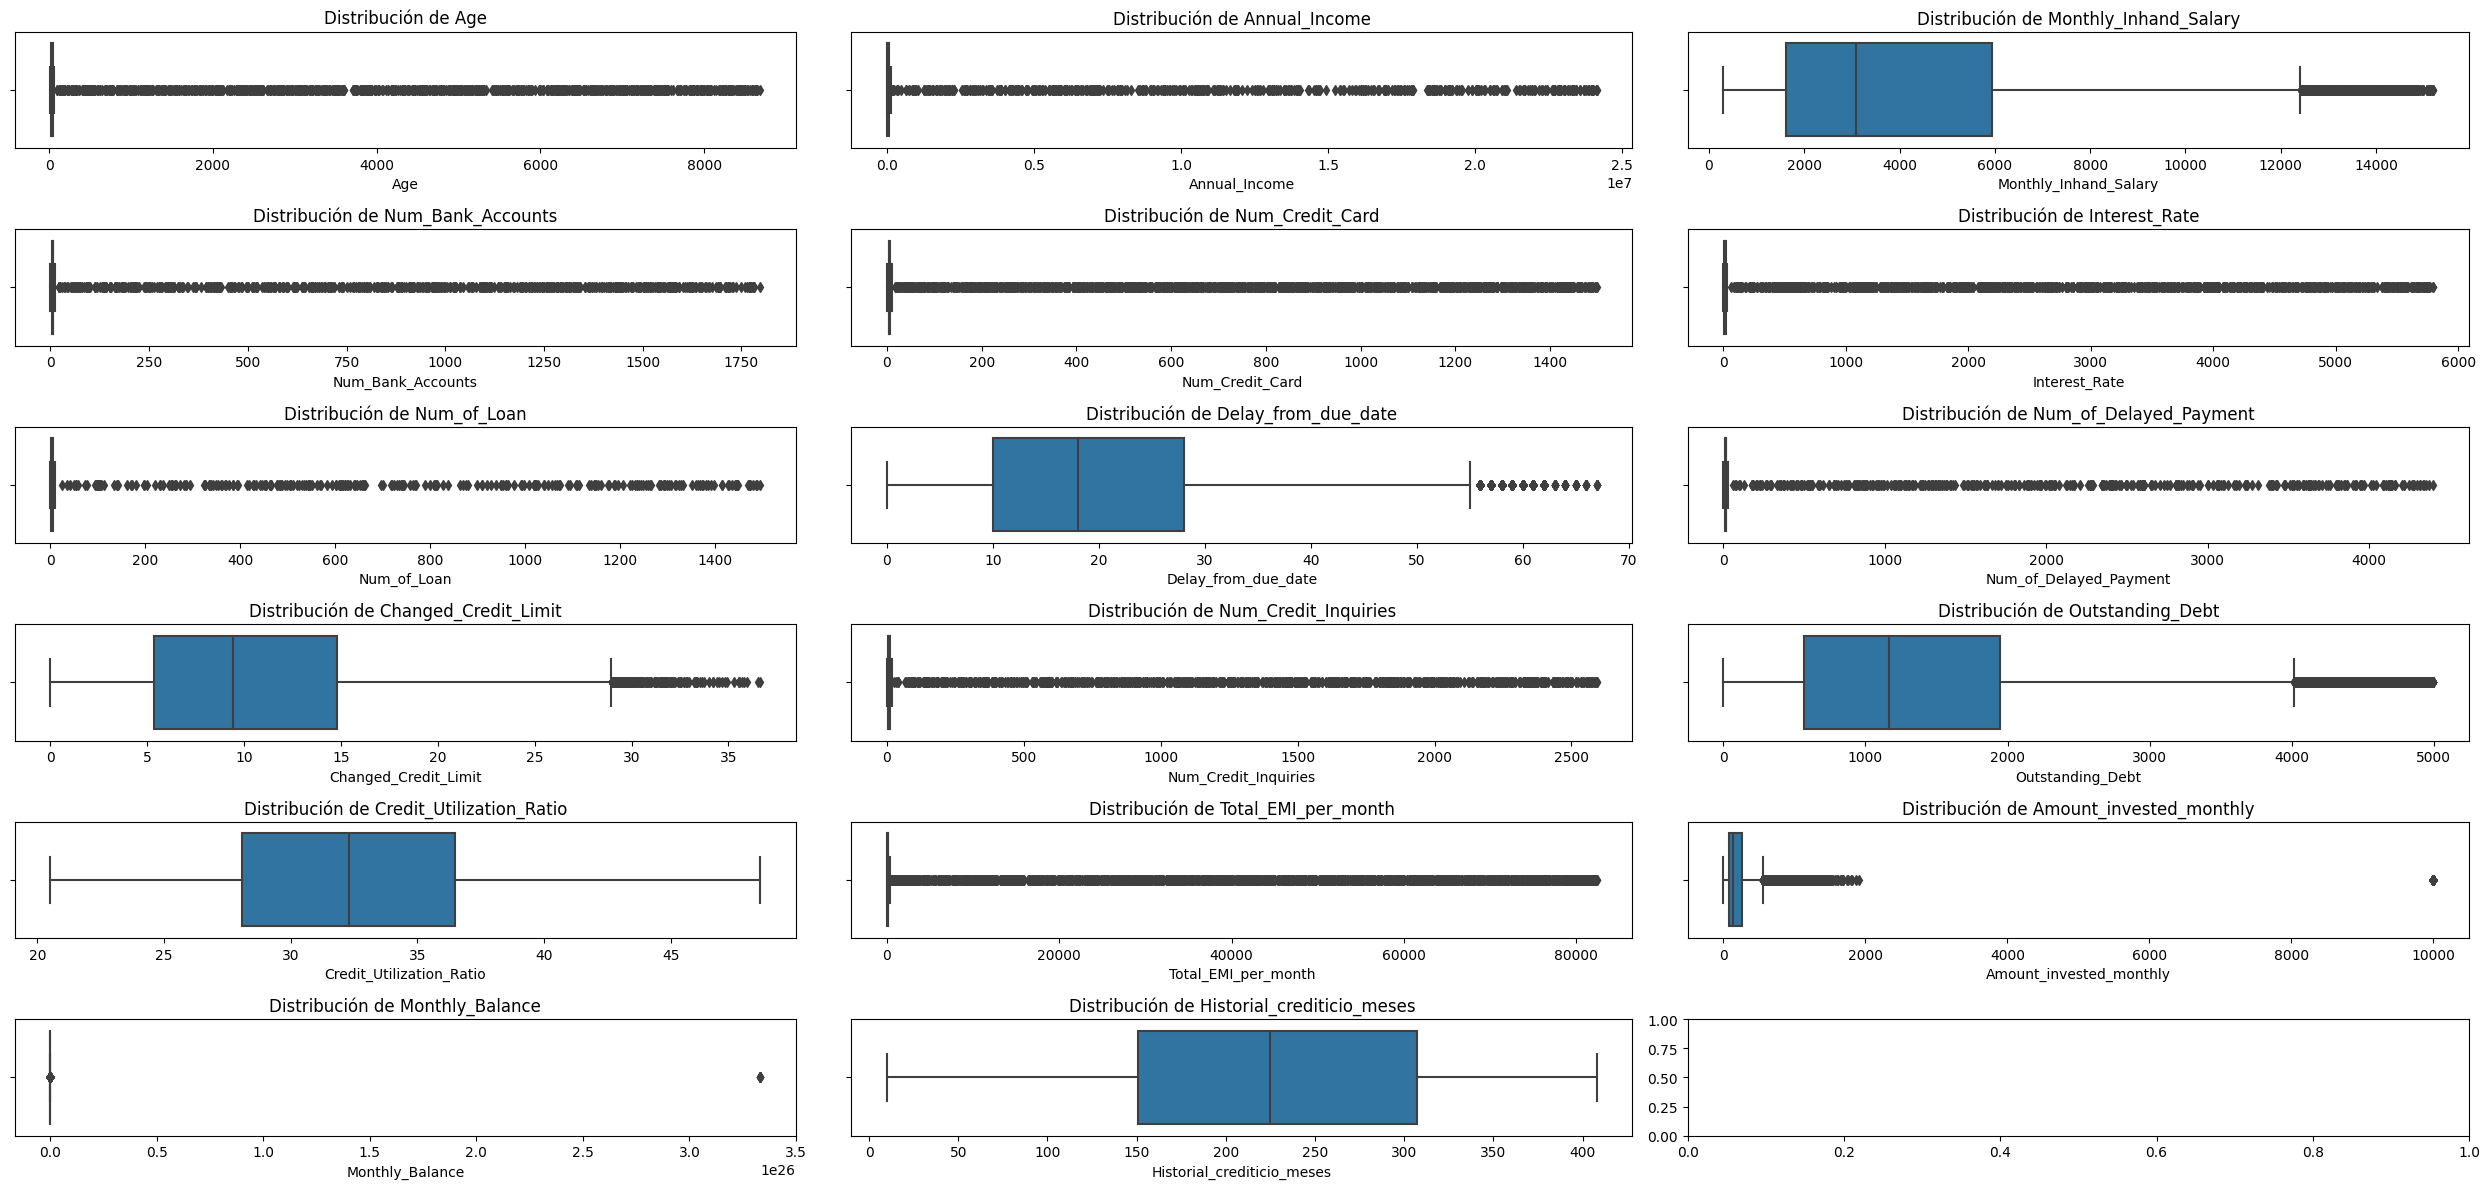

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(25,12))

variables=['Age','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment',
           'Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance',
           'Historial_crediticio_meses']

for i, ax in zip(variables, axes.ravel()):
    sns.boxplot(x=i, data=creditos, ax=ax, orient="h")
    ax.set_yticklabels(ax.get_yticklabels(), rotation=90)
    ax.set_title("Distribución de " + i)

plt.tight_layout()
plt.show()


**Se chequea estadísticas descriptivas de las columnas con datos numéricos.**

In [ ]:
display(creditos.describe().T)

,count,mean,std,min,25%,50%,75%,max
Age,50000.0,1.189944e+02,6.781333e+02,14.000000,25.000000,34.000000,43.000000,8.688000e+03
Annual_Income,50000.0,1.663342e+05,1.351965e+06,7005.930000,19453.327500,37577.820000,72817.020000,2.413726e+07
Monthly_Inhand_Salary,42502.0,4.182004e+03,3.174109e+03,303.645417,1625.188333,3086.305000,5934.189094,1.520463e+04
Num_Bank_Accounts,50000.0,1.683890e+01,1.163968e+02,0.000000,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,50000.0,2.292148e+01,1.293148e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,50000.0,6.877264e+01,4.516024e+02,1.000000,8.000000,13.000000,20.000000,5.799000e+03
Num_of_Loan,50000.0,1.129936e+01,6.548350e+01,0.000000,2.000000,3.000000,6.000000,1.496000e+03
Delay_from_due_date,50000.0,2.108088e+01,1.482031e+01,0.000000,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,46502.0,3.091037e+01,2.215075e+02,0.000000,9.000000,14.000000,18.000000,4.399000e+03
Changed_Credit_Limit,48941.0,1.045805e+01,6.651572e+00,0.000000,5.360000,9.410000,14.800000,3.665000e+01


**Se eliminan los registros que se consideran outlayers:**

-Edades mayores a 99 años

-El ingreso anual es mayor a 250000 USD

-El número de cuentas bancarias sea mayor a 20

-El número de tarjetas de crédito sea mayor a 20

-La tasa de interés sea mayor a 99

-Clientes que hayan tomado más de 20 préstamos

-El número de pagos retrasados sea mayor a 99

-El cambio en el límite crediticio sea 1000

-Los números de consultas de tarjetas de créditos sean mayores a 20

-Los pagos mensuales del EMI sean mayores a 500 o iguales a 0

-La inversión mensual sea mayor a 2000

-El Balance mensual sea mayor a 3e+16

In [ ]:
import warnings

# Suprimir todas las advertencias
warnings.filterwarnings("ignore")

#Se crea lista de los campos en los cuales se eliminarán los registros mayores a 99
list99=['Age','Interest_Rate','Num_of_Delayed_Payment']
list20=['Num_Bank_Accounts','Num_Credit_Card','Num_of_Loan','Num_Credit_Inquiries']

#Se eliminan registros erroneos
for i in list99:
  creditos.loc[creditos[i]>99 ,i]=pd.np.nan

for i in list20:
  creditos.loc[creditos[i]>20 ,i]=pd.np.nan

creditos.loc[creditos['Annual_Income']>250000 ,'Annual_Income']=pd.np.nan
creditos.loc[creditos['Changed_Credit_Limit']>1000 ,'Changed_Credit_Limit']=pd.np.nan
creditos.loc[creditos['Total_EMI_per_month']>500 ,'Total_EMI_per_month']=pd.np.nan
creditos.loc[creditos['Total_EMI_per_month']==0 ,'Total_EMI_per_month']=pd.np.nan
creditos.loc[creditos['Amount_invested_monthly']>2000 ,'Amount_invested_monthly']=pd.np.nan
creditos.loc[creditos['Monthly_Balance']>3e+16 ,'Monthly_Balance']=pd.np.nan

**Se muestra cuantos valores nulos posee cada columna**

In [ ]:
# Columnas con porcentaje de nulos
pd.set_option('display.max_rows', None)
serie=(creditos.isnull().sum()/creditos.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Credit_Mix                    19.610
Total_EMI_per_month           16.090
Monthly_Inhand_Salary         14.996
Type_of_Loan                  11.408
Historial_crediticio_meses     8.940
Amount_invested_monthly        8.892
Num_of_Delayed_Payment         7.778
Payment_Behaviour              7.600
Occupation                     6.876
Num_of_Loan                    4.464
Num_Credit_Inquiries           3.762
Age                            2.802
Num_Credit_Card                2.352
Changed_Credit_Limit           2.118
Interest_Rate                  1.926
Num_Bank_Accounts              1.270
Monthly_Balance                1.136
Annual_Income                  1.002
dtype: float64

Se procede a eliminar o completar los NAN. En el caso de 'Credit_Mix' al ser el dato etiqueta se procede a eliminar los valores vacíos. En el caso de 'Monthly_Inhand_Salary','Total_EMI_per_month','Historial_crediticio_meses','Num_of_Delayed_Payment','Interest_Rate','Num_of_Loan',
'Num_Credit_Card' se procede a rellenarlo haciendo una interpolación lineal. Y Para el caso de los datos restantes se completaran con el valor más cercano. A todos los campos que se les aplico interpolación lineal se le aplica nuevamente completar con valor más cercano para que complete los valores que habían quedado sin completar.


In [ ]:
#Se crean lista con los campos a los cuales se les aplicará interpolación líneal, a cuales se les aplicará el valor más cercano y a cuales se eliminaran.
listintlin=['Annual_Income','Monthly_Inhand_Salary','Total_EMI_per_month','Historial_crediticio_meses','Num_of_Delayed_Payment','Interest_Rate','Num_of_Loan','Num_Credit_Card'] #interpolación lineal
listvalcer=['Age','Occupation','Annual_Income','Type_of_Loan','Num_Bank_Accounts','Num_of_Loan','Monthly_Inhand_Salary','Num_of_Delayed_Payment','Changed_Credit_Limit','Interest_Rate',
            'Amount_invested_monthly','Monthly_Balance','Num_Credit_Inquiries','Num_Credit_Card','Payment_Behaviour','Total_EMI_per_month','Payment_of_Min_Amount'
            ,'Historial_crediticio_meses'] #valor más cercano
listelim=['Credit_Mix'] #se eliminarán

#reemplazo valores en blanco con interpolación lineal
creditos.loc[:,listintlin].interpolate(method="linear",inplace=True)

#reemplazo valores en blanco con el valor más cercano
creditos.loc[:,listvalcer]=creditos.loc[:,listvalcer].fillna(method='ffill').fillna(method='bfill')

#elimino los valores en blanco
creditos.dropna(subset=listelim,inplace=True)

**Una vez eliminados los valores erróneos:**

---


Se procede a rellenar o eliminar los registros vacíos, optando por completar con la moda en algunos campos, en otros campos se optó por realizar una interpolación lineal y en otros se emplea aplicar el valor más cercano (algunos de los campos a los que se aplicó interpolación lineal, luego se completó valor más cercano para dichos valores que no se pudo realizar la interpolación). En el caso del "Credit_Mix" se optó por eliminar las filas donde estos se encontraran vacíos, ya que es el dato etiqueta del modelo.

**Al aparecer 4 veces cada cliente en el data frame se procede a eliminar registros dejando solo un registro por cliente, y conservando el último registro de cada cliente.**

In [ ]:
print(creditos.shape)
creditos= creditos.drop_duplicates(['Customer_ID'],keep='last')
print(creditos.shape)

(40195, 23)
(12479, 23)


**Se convierten a tipo de datos enteros los flotantes.**

Luego de agregar los NAN se pueden convertir los flotantes a enteros para un menos consumo de recursos. Algunos de los datos se redondearan al entero más elevado ya que la información que se pierde es despreciable como son el caos de 'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt', etc. y el caso de datos como 'Age', 'Num_Bank_Accounts', etc porque es el tipo de dato que corresponde.

In [ ]:
#Se crea lista con las campos a los que se les va a cambiar el tipo de dato
conint=['Age','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment',
        'Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance','Historial_crediticio_meses']

#Se realiza la conversión
for i in conint:
  creditos[i]=creditos[i].astype(int)

**Se redondea a 2 decimales los datos del campo Credit_Utilization_Ratio**

In [ ]:
creditos['Credit_Utilization_Ratio'] = creditos['Credit_Utilization_Ratio'].round(2)

Se procede a crear un campo con la cantidad de los distintos tipos de préstamos  que ha pedido cada cliente.

In [ ]:
#Se importa el módulo json_normaliza
from pandas import json_normalize

#Se crea un dataframe auxiliar
aux=creditos.loc[:,['Customer_ID','Type_of_Loan']]

#Se eliminan los and
aux['Type_of_Loan']=aux['Type_of_Loan'].str.replace('and ', '')

#Se crea data frame auxiliar
aux = aux.join(aux['Type_of_Loan'].str.split(",", expand=True).add_prefix('Type_of_Loan_'))

#Se elimina el campo Type_of_Loan del data frame auxiliar
aux.drop(['Type_of_Loan'],axis=1,inplace=True)

aux.head(16)

,Customer_ID,Type_of_Loan_0,Type_of_Loan_1,Type_of_Loan_2,Type_of_Loan_3,Type_of_Loan_4,Type_of_Loan_5,Type_of_Loan_6,Type_of_Loan_7,Type_of_Loan_8
3,CUS_0xd40,Auto Loan,Credit-Builder Loan,Personal Loan,Home Equity Loan,None,None,None,None,None
5,CUS_0x21b1,Credit-Builder Loan,None,None,None,None,None,None,None,None
11,CUS_0x2dbc,Auto Loan,Auto Loan,Not Specified,None,None,None,None,None,None
15,CUS_0xb891,Not Specified,None,None,None,None,None,None,None,None
19,CUS_0x1cdb,Not Specified,None,None,None,None,None,None,None,None
23,CUS_0x95ee,Not Specified,None,None,None,None,None,None,None,None
27,CUS_0x284a,Credit-Builder Loan,Mortgage Loan,None,None,None,None,None,None,None
31,CUS_0x5407,Not Specified,Auto Loan,Student Loan,None,None,None,None,None,None
34,CUS_0x4157,Personal Loan,Debt Consolidation Loan,Auto Loan,None,None,None,None,None,None
39,CUS_0xba08,Not Specified,Payday Loan,None,None,None,None,None,None,None


Se cambian los nan a None

In [ ]:
#Se ccrea una serie con todos los campos en los que se realizaran las modificaciones
acamb = pd.Series(aux.columns)
acamb
#Se procede a cambiar los nan  por None
aux[acamb]=aux[acamb].applymap(lambda x: None if pd.isna(x) else x)

Se normalizan los datos de los campos.

In [ ]:
#Se reemplazan los espcios en blanco por guion bajo y se eliminan todos los guiones bajos con los que epiezan los datos
aux = aux.applymap(lambda x: x.replace(' ', '_') if isinstance(x, str) else x)
aux = aux.apply(lambda x: x.str.replace(r'^_', '', 1))

Se crea una columna por cada tipo de prestamo

In [ ]:
aux.loc[:,['Auto_Loan', 'Credit-Builder_Loan', 'Not_Specified','Personal_Loan', 'Payday_Loan', 'Mortgage_Loan',
           'Home_Equity_Loan', 'Debt_Consolidation_Loan', 'Student_Loan']]=None

Se procede a completar los datos de los campos creados anteriormente

In [ ]:
#Se crea lista auxiliar
listaval=['Auto_Loan', 'Credit-Builder_Loan', 'Not_Specified','Personal_Loan', 'Payday_Loan', 'Mortgage_Loan',
           'Home_Equity_Loan', 'Debt_Consolidation_Loan', 'Student_Loan']

#Se carga 0 en cada valor de las cloumnas creadas en la celda anterior
for i in listaval:
    aux[i] = 0

In [ ]:
#Se crea lista para cada columna en la que se encuentran los valores a inspeccionar
listacol=['Type_of_Loan_0', 'Type_of_Loan_1', 'Type_of_Loan_2', 'Type_of_Loan_3','Type_of_Loan_4', 'Type_of_Loan_5', 'Type_of_Loan_6', 'Type_of_Loan_7','Type_of_Loan_8']

#Se procede a cargar 1 en cada columna que se encuentre mencionada en las columnas de tiype of loan
for i in listaval:
  for k in listacol:
    aux.loc[aux[k] == i, i] = 1

Se eliminan todas las columnas Type_of_Loan

In [ ]:
for i in listacol:
  aux.drop([i],axis=1,inplace=True)

**Se crea el campo Diferent_Loans**

 Este campo muestra la cantidad de los distintos tipos de créditos que solicito el cliente.

In [ ]:
aux['Diferent_Loans']=aux.sum(axis=1)

Se cargan los nuevos campos al datafrme creditos.

In [ ]:
creditos = pd.merge(creditos, aux, on='Customer_ID')

Se elimina el campo 'Type_of_Loan'

In [ ]:
creditos.drop('Type_of_Loan',axis=1,inplace=True)

**Se crean nuevas columnas con representación numérica de los campos 'Payment_Behaviour', 'Payment_of_Min_Amount', 'Occupation' y 'Credit_Mix'**

In [ ]:
#Se importa Label Encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#Se crea las nuevas columnas numéricas

#Con los campos 'Occupation' y 'Credit_Mix' se utilizará label encoder
creditos['Numeric_Occupation'] = LabelEncoder().fit_transform(creditos['Occupation'])
creditos['Numeric_Credit_Mix'] = LabelEncoder().fit_transform(creditos['Credit_Mix'])

#Con los campos 'Payment_Behaviour' y 'Payment_of_Min_Amount' se empleará one hot encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
dat = encoder.fit_transform(creditos[['Payment_Behaviour','Payment_of_Min_Amount']])
nomcolum = encoder.get_feature_names_out(['Payment_Behaviour','Payment_of_Min_Amount'])
aux = pd.DataFrame(dat, columns=nomcolum)

#Uno el dataframe con el nuevo dataframe de los one hot encoding
aux=aux.reset_index(drop=True)
creditos=creditos.reset_index(drop=True)
creditos=pd.concat([creditos,aux],axis=1)

#elimino los campos a los que se les aplicó one hot encoding y label encoder, a excepció 'Credit_Mix' que es el dato etiqueta
#creditos.drop(['Occupation','Payment_Behaviour','Payment_of_Min_Amount'],axis=1,inplace=True)

**Se colocan los campos 'Numeric_Credit_Mix' y 'Credit_Mix' al final del data frame, ya que este va a ser la etiqueta del modelo**

In [ ]:
# Extraer la columna a mover
Credit_Mix = creditos.pop('Credit_Mix')
Numeric_Credit_Mix=creditos.pop('Numeric_Credit_Mix')

# Añadir la columna extraída al final del DataFrame
creditos['Numeric_Credit_Mix'] = Numeric_Credit_Mix
creditos['Credit_Mix'] = Credit_Mix

Ya que el campo 'Numeric_Credit_Mix' posee variables ordinales. Se acomodan los valores.

In [ ]:
#Valores de Credit_Mix
creditos.loc[creditos['Credit_Mix']=='Bad',['Numeric_Credit_Mix']]=0
creditos.loc[creditos['Credit_Mix']=='Standard',['Numeric_Credit_Mix']]=1
creditos.loc[creditos['Credit_Mix']=='Good',['Numeric_Credit_Mix']]=2

#Análisis de datos

**Análisis univariado**

Se procede a realizar histograma de todas las variables numéricas.

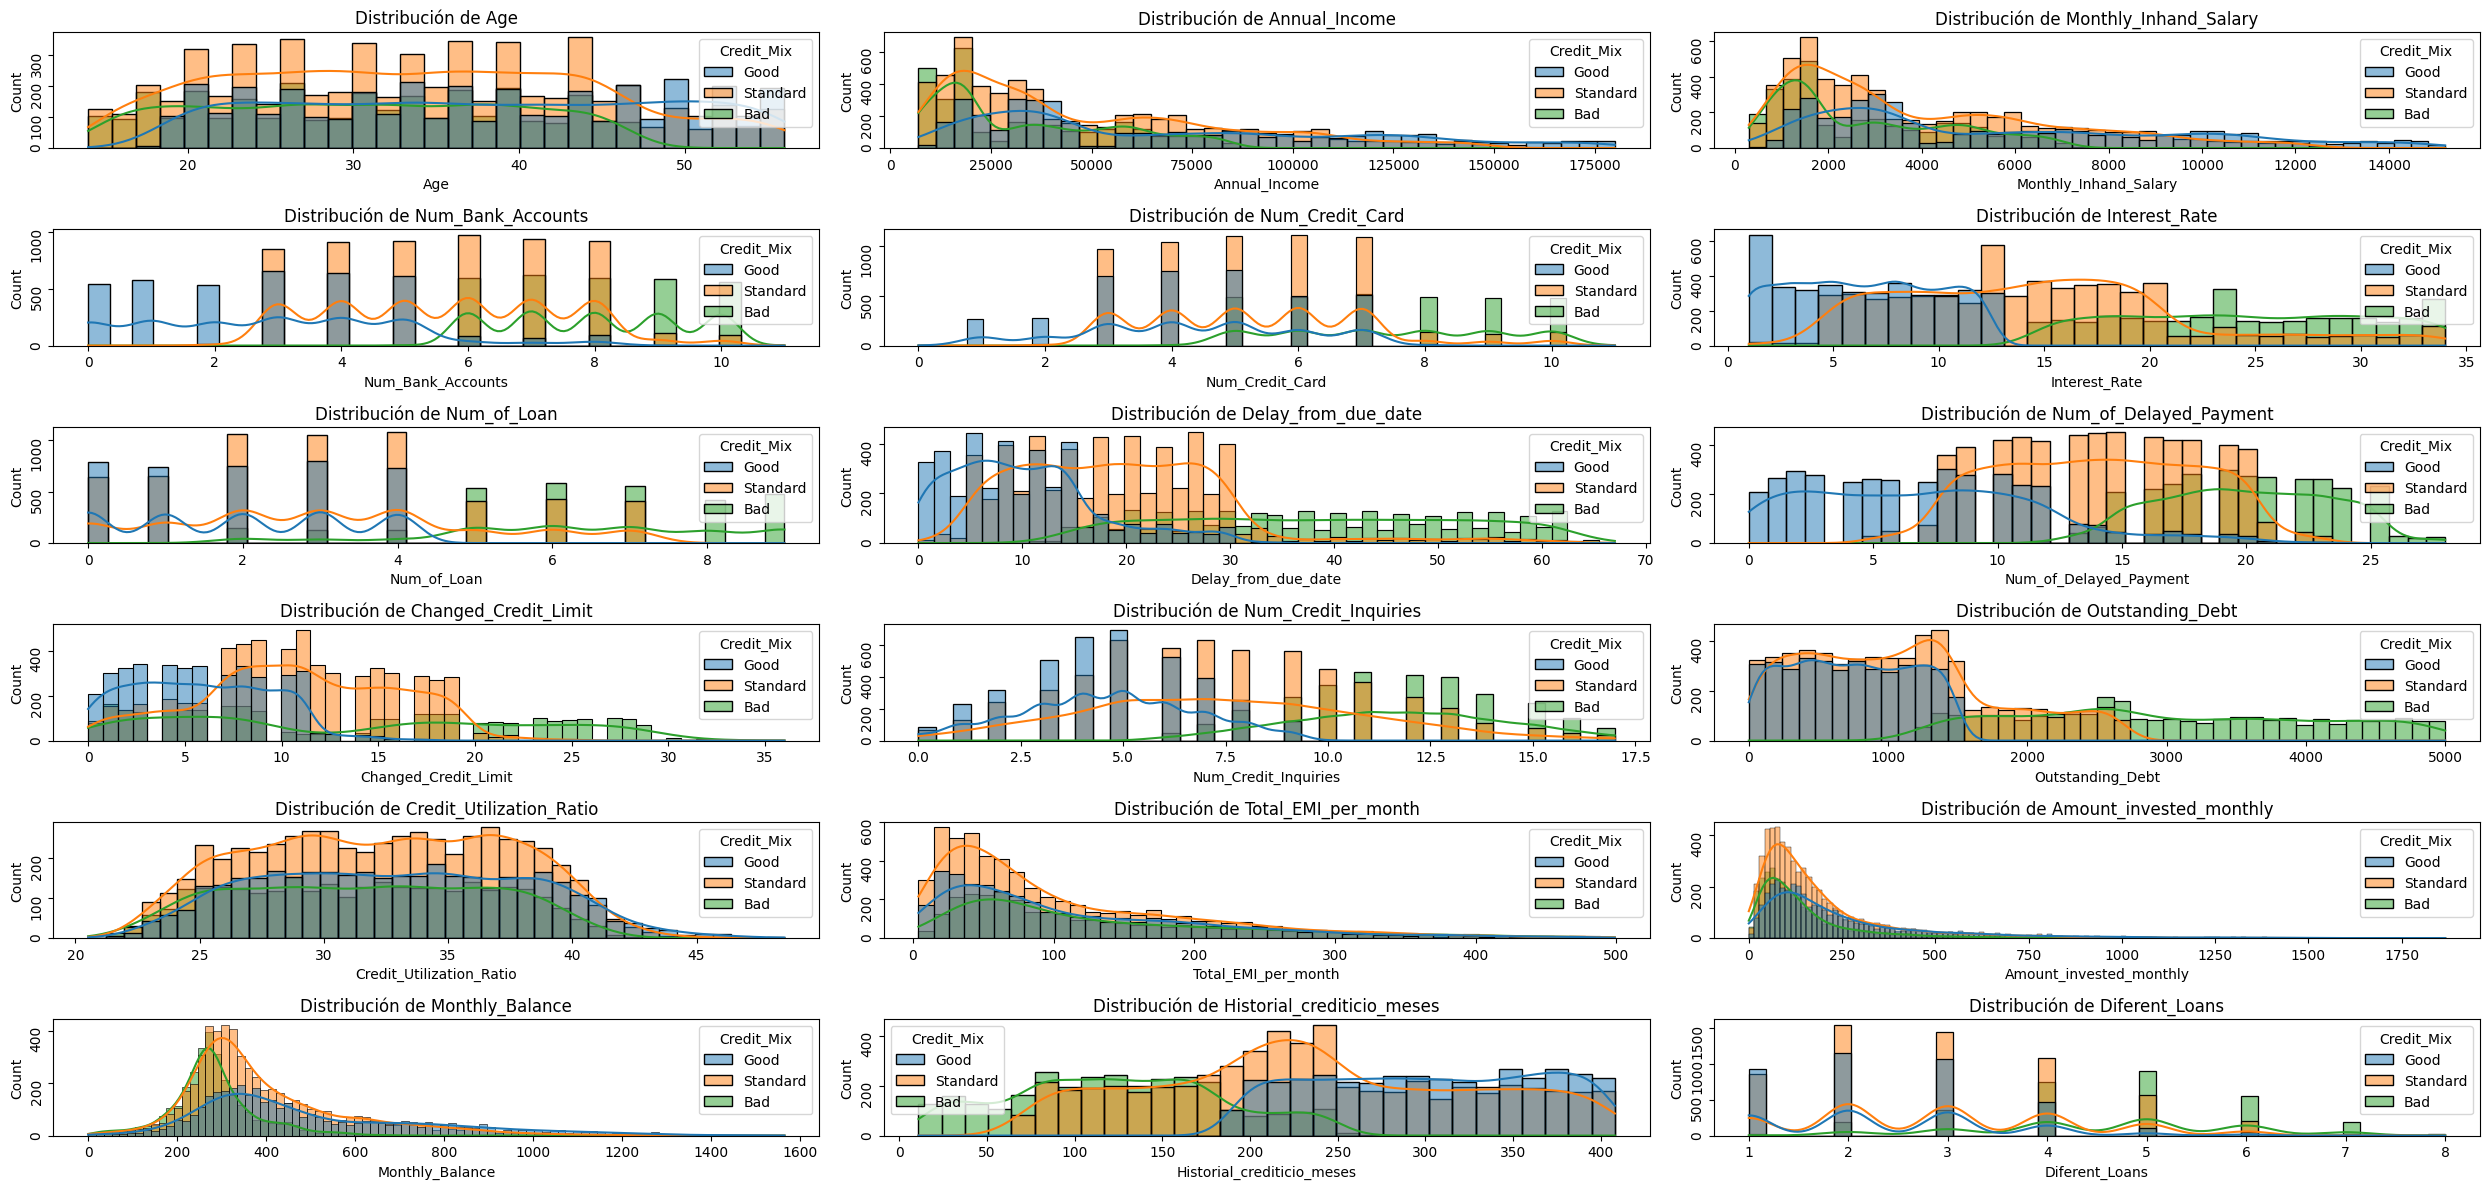

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(25,12))

variables=['Age','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment',
           'Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance',
           'Historial_crediticio_meses','Diferent_Loans']

for i, ax in zip(variables, axes.ravel()):
    sns.histplot(x=i, data=creditos, ax=ax, kde=True, hue= 'Credit_Mix')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=90)
    ax.set_title("Distribución de " + i)

plt.tight_layout()
plt.show()


Se puede observar que:


*   Los que son considerados buenos clientes tienden a poseer una menor cantidad de cuentas bancarias y aquellos que son considerados malos clientes tienden a tener un mayor número de cuentas bancarias
*   Aquellos que son considerados malos clientes tienden a tener un interés mayor, mientras que aquellos que son considerados buenos clientes tienden a tener intereses más bajos.
*   Se puede observar que aquellos que son considerados malos clientes tienden a tener mayor número de préstamos, y que aquellos que son considerados buenos clientes tienden a tener menor cantidad de préstamos.
*   Se puede observar que aquellos que son considerados malos clientes tienden a tener mayores días de demoras en los pagos, mientras que aquellos que son considerados buenos clientes tienden a tener menores días de demoras en los pagos.
*   Se puede observar que aquellos que son considerados malos clientes tienden a tener mayores cantidades de demoras en los pagos, mientras que aquellos que son considerados buenos clientes tienden a tener menores cantidades de demoras en los pagos.
*   Se puede observar que aquellos que son considerados malos clientes tienden a tener mayores cantidades de consultas crediticias, mientras que aquellos que son considerados buenos clientes tienden a tener menores cantidades de consultas crediticias.
*   Se puede observar que aquellos que son considerados malos clientes tienden a tener montos de deuda mayores, mientras que aquellos que son considerados buenos clientes tienden a tener montos de deuda menores.
*   Se puede observar que aquellos que son considerados malos clientes tienden a tener un historial crediticio menor, mientras que aquellos que son considerados buenos clientes tienden a tener historial crediticio mayores.

-------------

Se procede a realizar un gráfico de barras para ver la distribución de las variables categóricas más relevante.







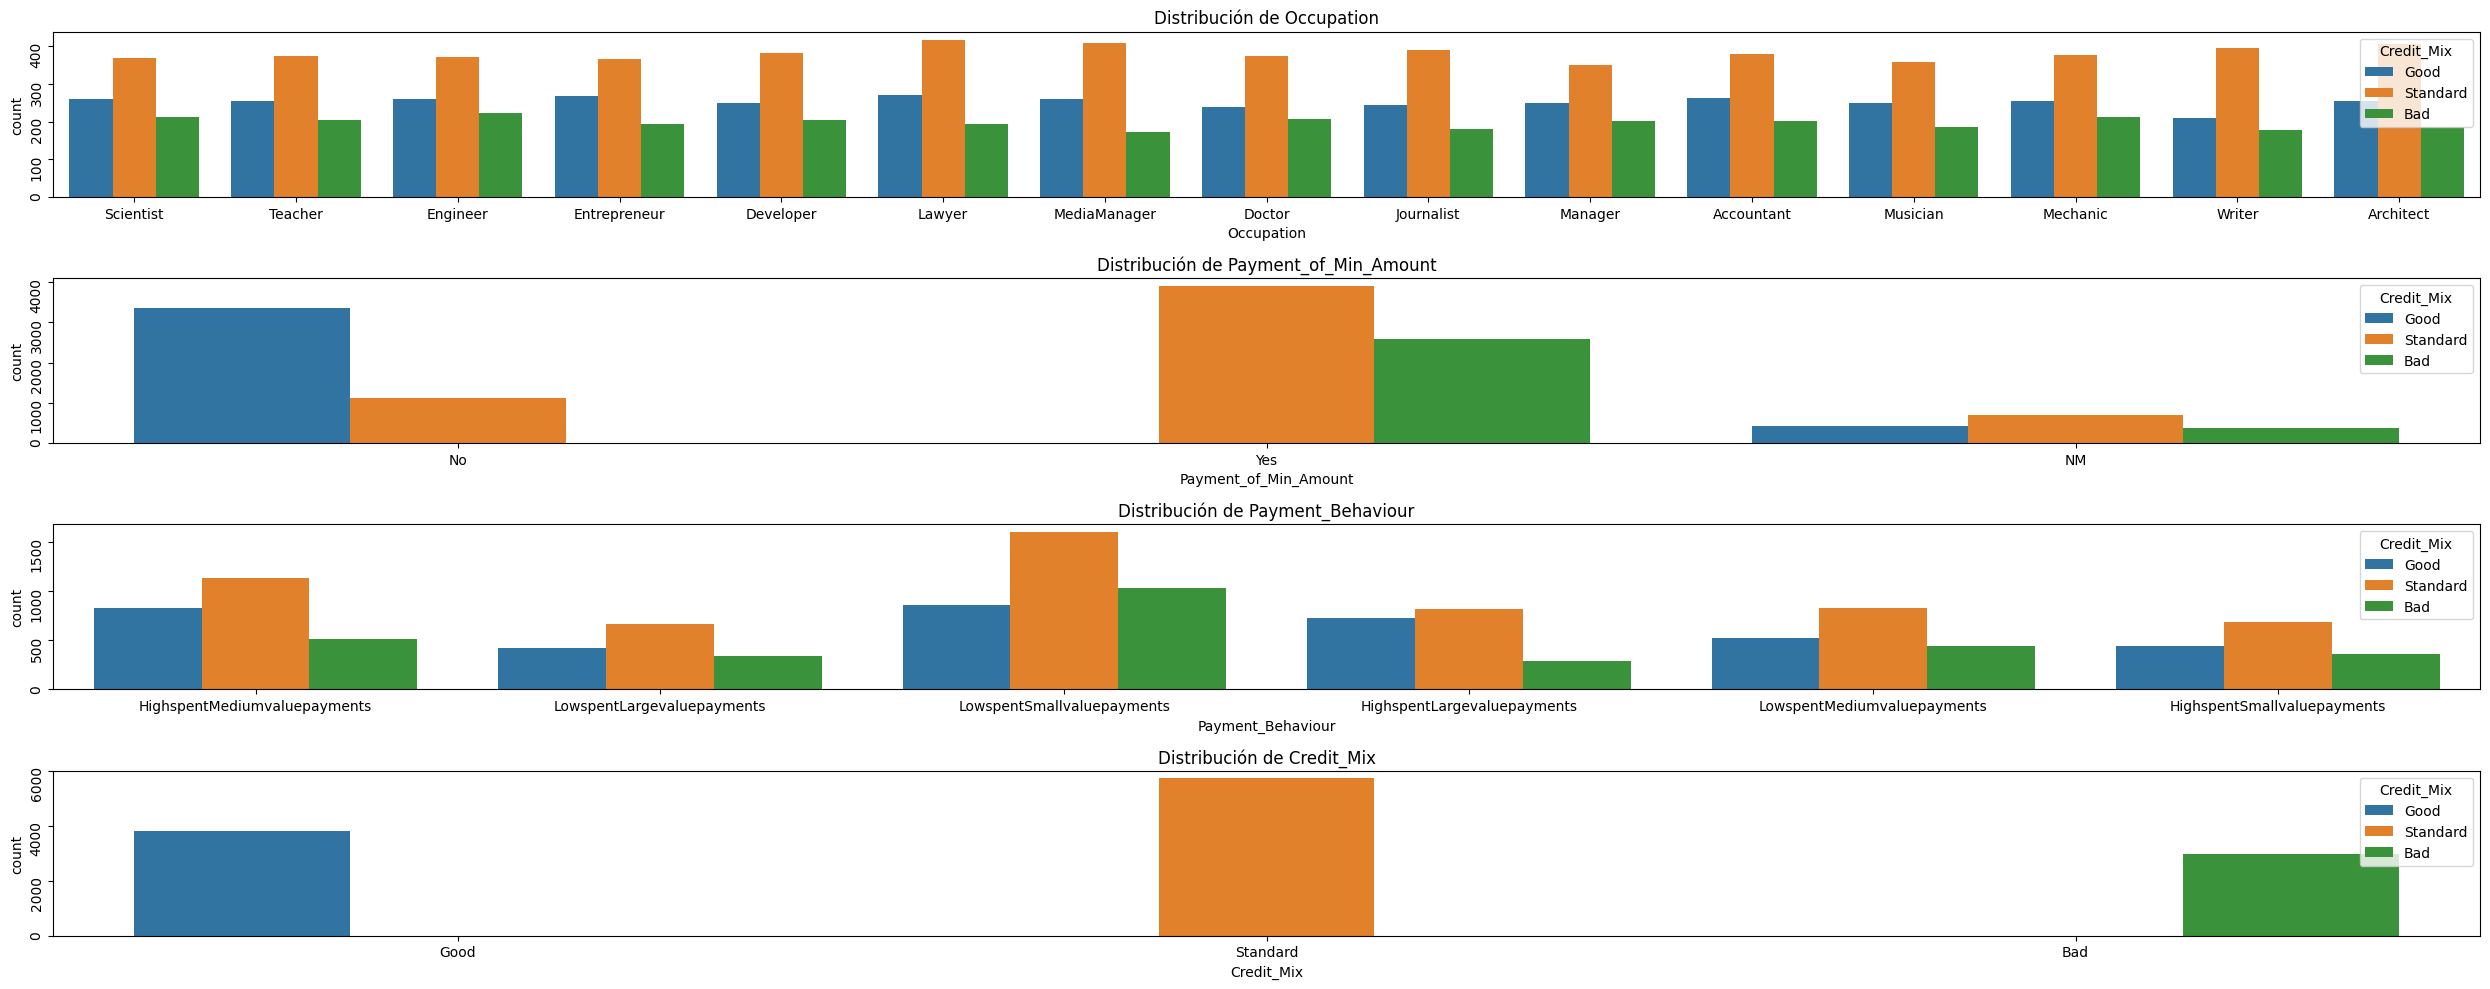

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(25,10))

variables=['Occupation','Payment_of_Min_Amount','Payment_Behaviour','Credit_Mix']

for i, ax in zip(variables, axes.ravel()):
    sns.countplot(x=i, data=creditos, ax=ax, hue= 'Credit_Mix')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=90)
    ax.set_title("Distribución de " + i)

plt.tight_layout()
plt.show()


Se puede observar que:


*   Los que se consideran buenos clientes no realizaron pagos de las cantidades mínimas y que los que se consideran malos clientes realizan pagos de las cantidades mínimas. Se observa que los clientes que no poseen un monto mínimo establecido de pago son un grupo significativamente menor con respecto a aquellos que si lo poseen.

*   Se observa que la distribución de datos etiqueta ('Credit_Mix') no poseen una distribución desbalanceada de modo tal que vaya a afectar el entrenamiento del modelo.

-----------------------------

Se separan a los clientes por sus distintas etiquetas, y analiza la deuda pendiente de los clientes con respecto al comportamiento de pago frente al monto mínimo.


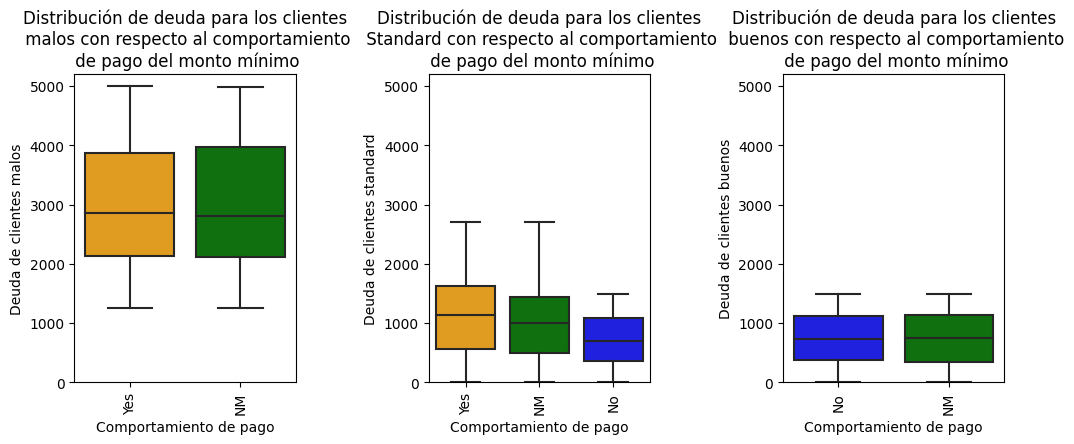

In [ ]:
# Crear un lienzo y los subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4),gridspec_kw={'wspace': 0.6})
colores_custom = {'No': "blue", 'NM': "green", 'Yes': "orange"}

# Realizar los gráficos de boxplot
sns.boxplot(ax=axes[0],x=creditos.loc[creditos['Credit_Mix']=='Bad','Payment_of_Min_Amount'], y=creditos['Outstanding_Debt'], palette=colores_custom)
sns.boxplot(ax=axes[1],x=creditos.loc[creditos['Credit_Mix']=='Standard','Payment_of_Min_Amount'], y=creditos['Outstanding_Debt'], palette=colores_custom)
sns.boxplot(ax=axes[2],x=creditos.loc[creditos['Credit_Mix']=='Good','Payment_of_Min_Amount'], y=creditos['Outstanding_Debt'], palette=colores_custom)

# Ajustar las etiquetas del eje x en forma vertical
axes[0].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='x', rotation=90)
axes[2].tick_params(axis='x', rotation=90)

#Título y nombre de los ejes
axes[0].set_title("Distribución de deuda para los clientes\n malos con respecto al comportamiento\n de pago del monto mínimo")
axes[0].set_xlabel("Comportamiento de pago")
axes[0].set_ylabel("Deuda de clientes malos")
axes[0].set_ylim(0, 5200)  # Límites del eje y
axes[1].set_title("Distribución de deuda para los clientes\n Standard con respecto al comportamiento\n de pago del monto mínimo")
axes[1].set_xlabel("Comportamiento de pago")
axes[1].set_ylabel("Deuda de clientes standard")
axes[1].set_ylim(0, 5200)  # Límites del eje y
axes[2].set_title("Distribución de deuda para los clientes\n buenos con respecto al comportamiento\n de pago del monto mínimo")
axes[2].set_xlabel("Comportamiento de pago")
axes[2].set_ylabel("Deuda de clientes buenos")
axes[2].set_ylim(0, 5200)  # Límites del eje y

# Mostrar los gráficos
plt.show()


Se observa el rango de deuda de los malos clientes rondan entre los 1100 USD a 5000 USD, y estos realizan el pago mínimo o no poseen monto mínimo a pagar.

En el caso de los buenos clientes se observa que la deuda no supera los 1300 USD, y estos no realizan el pago del monto mínimo o no poseen monto mínimo a pagar.

Para el caso de los clientes standards la deuda llega hasta los 2900 USD, y dentro de ellos están los que no realizan el pago del monto mínimo, realizan pago del monto mínimo o no poseen monto mínimo a pagar.


-------------------

Se separan a los clientes por sus distintas etiquetas, y analiza la el interés de los clientes con respecto a la cantidad promedio de días de demora y con respecto al comportamiento de pago frente al monto mínimo.

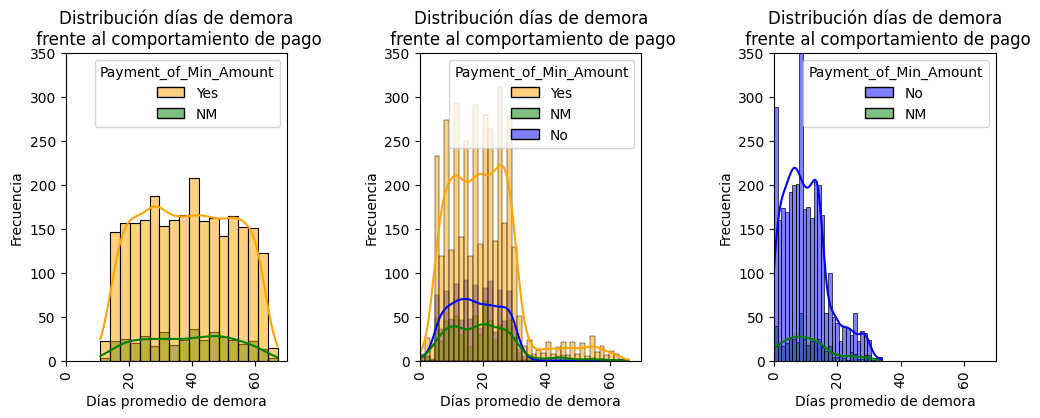

In [ ]:
# Crear un lienzo y los subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4),gridspec_kw={'wspace': 0.6})
colores_custom = {'No': "blue", 'NM': "green", 'Yes': "orange"}
# Realizar los gráficos de boxplot
sns.histplot(x='Delay_from_due_date', data=creditos.loc[creditos['Credit_Mix']=='Bad',:], ax=axes[0], kde=True, hue= 'Payment_of_Min_Amount', palette=colores_custom)
sns.histplot(x='Delay_from_due_date', data=creditos.loc[creditos['Credit_Mix']=='Standard',:], ax=axes[1], kde=True, hue= 'Payment_of_Min_Amount', palette=colores_custom)
sns.histplot(x='Delay_from_due_date', data=creditos.loc[creditos['Credit_Mix']=='Good',:], ax=axes[2], kde=True, hue= 'Payment_of_Min_Amount', palette=colores_custom)

# Ajustar las etiquetas del eje x en forma vertical
axes[0].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='x', rotation=90)
axes[2].tick_params(axis='x', rotation=90)

#Título y nombre de los ejes de los graficos de dispersión
axes[0].set_title("Distribución días de demora\n frente al comportamiento de pago")
axes[0].set_xlabel("Días promedio de demora")
axes[0].set_ylabel("Frecuencia")
axes[0].set_ylim(0, 350)  # Límites del eje y
axes[0].set_xlim(0, 70)  # Límites del eje x
axes[1].set_title("Distribución días de demora\n frente al comportamiento de pago")
axes[1].set_xlabel("Días promedio de demora")
axes[1].set_ylabel("Frecuencia")
axes[1].set_ylim(0, 350)  # Límites del eje y
axes[1].set_xlim(0, 70)  # Límites del eje x
axes[2].set_title("Distribución días de demora\n frente al comportamiento de pago")
axes[2].set_xlabel("Días promedio de demora")
axes[2].set_ylabel("Frecuencia")
axes[2].set_ylim(0, 350)  # Límites del eje y
axes[2].set_xlim(0, 70)  # Límites del eje x

# Mostrar los gráficos
plt.show()


Se puede observar que los que se consideran malos clientes en su mayoría son aquellos que solo pagan el monto mínimo y una pequeña parte no tienen monto mínimo establecido. La cantidad promedio de días de demora van desde los 12 a los 64.

Se puede observar que los que se consideran buenos clientes en su mayoría son aquellos que no solo pagan el monto mínimo y una pequeña parte no tienen monto mínimo establecido. La cantidad promedio de días de demora van desde los 0 a los 30.

Se puede observar que los que se consideran buenos clientes en su mayoría son aquellos que solo pagan el monto mínimo y una pequeña parte no tienen monto mínimo establecido o no solo pagan el monto mínimo establecido. La cantidad promedio de días de demora van desde los 0 a los 64, mostrando una mayor concentración desde los 0 a 32 días.

------------

Se separan a los clientes por sus distintas etiquetas, y analiza los intereses de los clientes con respecto al comportamiento de pago frente al monto mínimo.

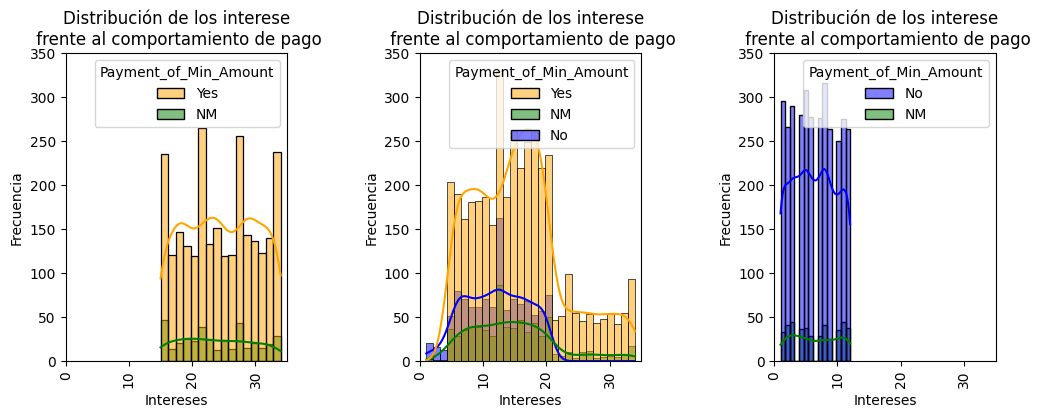

In [ ]:
# Crear un lienzo y los subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4),gridspec_kw={'wspace': 0.6})
colores_custom = {'No': "blue", 'NM': "green", 'Yes': "orange"}
# Realizar los gráficos de boxplot
sns.histplot(x='Interest_Rate', data=creditos.loc[creditos['Credit_Mix']=='Bad',:], ax=axes[0], kde=True, hue= 'Payment_of_Min_Amount', palette=colores_custom)
sns.histplot(x='Interest_Rate', data=creditos.loc[creditos['Credit_Mix']=='Standard',:], ax=axes[1], kde=True, hue= 'Payment_of_Min_Amount', palette=colores_custom)
sns.histplot(x='Interest_Rate', data=creditos.loc[creditos['Credit_Mix']=='Good',:], ax=axes[2], kde=True, hue= 'Payment_of_Min_Amount', palette=colores_custom)

# Ajustar las etiquetas del eje x en forma vertical
axes[0].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='x', rotation=90)
axes[2].tick_params(axis='x', rotation=90)

#Título y nombre de los ejes de los graficos de dispersión
axes[0].set_title("Distribución de los interese\n frente al comportamiento de pago")
axes[0].set_xlabel("Intereses")
axes[0].set_ylabel("Frecuencia")
axes[0].set_ylim(0, 350)  # Límites del eje y
axes[0].set_xlim(0, 35)  # Límites del eje x
axes[1].set_title("Distribución de los interese\n frente al comportamiento de pago")
axes[1].set_xlabel("Intereses")
axes[1].set_ylabel("Frecuencia")
axes[1].set_ylim(0, 350)  # Límites del eje y
axes[1].set_xlim(0, 35)  # Límites del eje x
axes[2].set_title("Distribución de los interese\n frente al comportamiento de pago")
axes[2].set_xlabel("Intereses")
axes[2].set_ylabel("Frecuencia")
axes[2].set_ylim(0, 350)  # Límites del eje y
axes[2].set_xlim(0, 35)  # Límites del eje x

# Mostrar los gráficos
plt.show()

Se puede observar que los que se consideran malos clientes en su mayoría son aquellos que solo pagan el monto mínimo y una pequeña parte no tienen monto mínimo establecido. Sus intereses rondan entre el 12% al 35%.

Se puede observar que los que se consideran buenos clientes en su mayoría son aquellos que no solo pagan el monto mínimo y una pequeña parte no tienen monto mínimo establecido. Sus intereses rondan entre el 1% al 12%.

Se puede observar que los que se consideran buenos clientes en su mayoría son aquellos que solo pagan el monto mínimo y una pequeña parte no tienen monto mínimo establecido o no solo pagan el monto mínimo establecido. Sus intereses rondan entre el 1% al 34%.


------------------------

**Se procede a un análisis bivariado.**


Solo se mostraran los análisis que se consideraron más relevantes para evitar cargar tanto el trabajo.



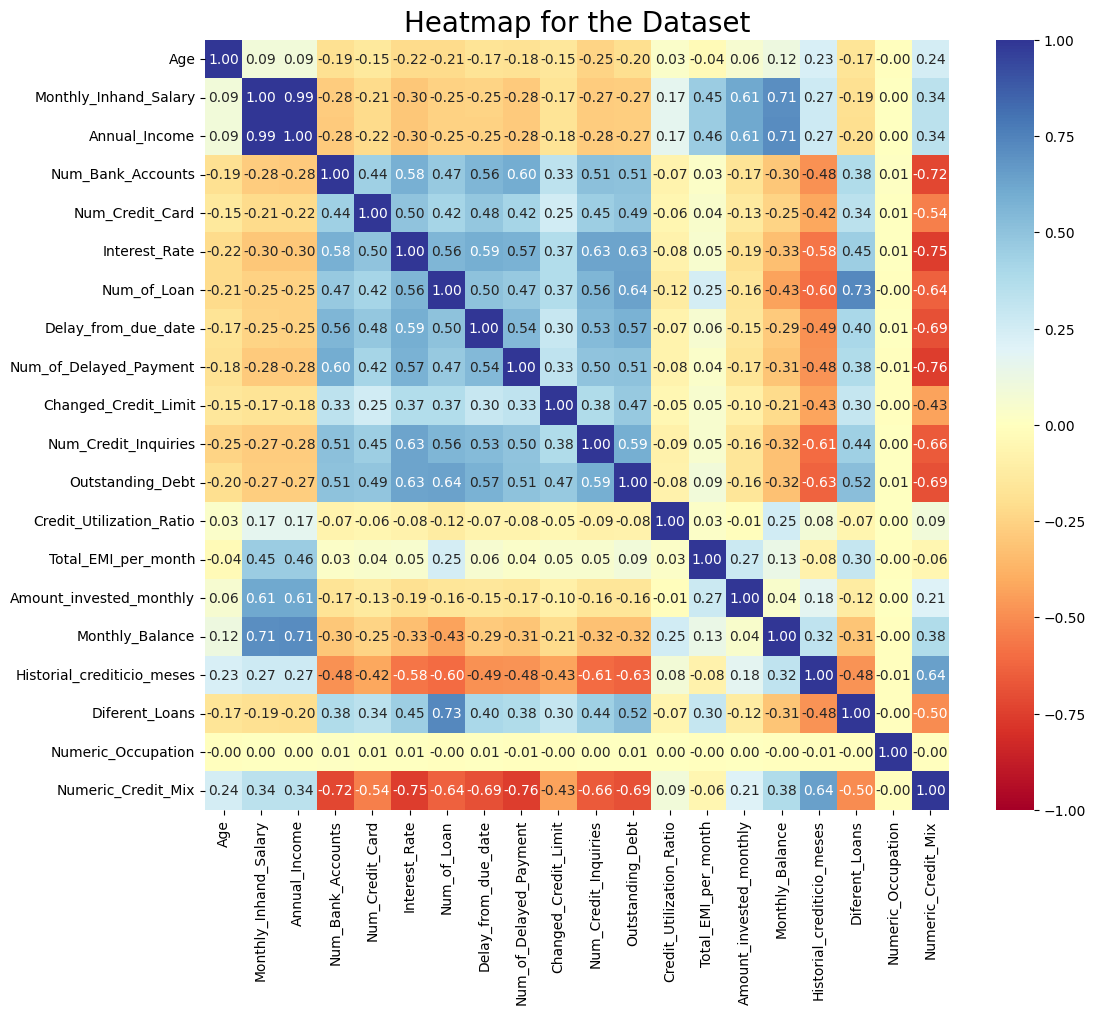

In [ ]:
#Lista de columnas a las que se aplicara correlación

lista=['Age', 'Monthly_Inhand_Salary', 'Annual_Income' ,'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Historial_crediticio_meses', 'Diferent_Loans', 'Numeric_Occupation', 'Numeric_Credit_Mix', 'Credit_Mix']

#Se realiza un HeatMap del data frame
plt.rcParams['figure.figsize'] = (12, 10)

sns.heatmap(creditos[lista].corr(), annot = True, cmap = 'RdYlBu',vmin=-1,vmax=1, fmt='.2f')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

Se observa que los únicos campos con una correlación alta son el ingreso mensual y el ingreso anual. Se observa que la variable 'Numeric_Occupation' no posee una correlación igual a 0 con todas las demás variables por lo que se precederá a eliminar dicha variable.

Se procede a realizar un gráfico de dispersión entre ambas variables.

/content


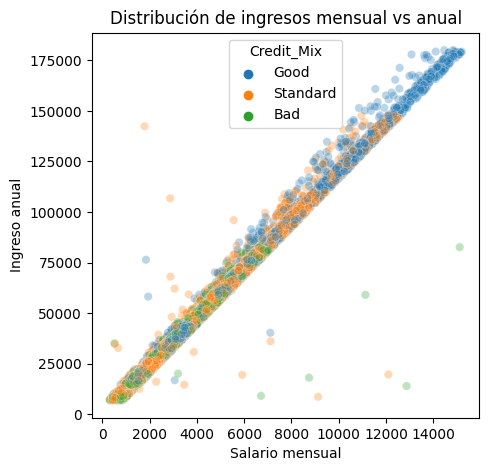

In [ ]:
#Se importa librería
import os

# Crear el lienzo
fig, ax=plt.subplots(figsize=(5,5))

# Gáfico
sns.scatterplot(x='Monthly_Inhand_Salary', y = 'Annual_Income', data = creditos,hue='Credit_Mix',alpha=0.3)

# Título y nombre de los ejes
plt.xlabel("Salario mensual")
plt.ylabel("Ingreso anual")
plt.title("Distribución de ingresos mensual vs anual")

# Se guarda el gráfico en la PC
plt.savefig('C:\\Users\\Cristina\\Desktop\\Nari\\DeudaVssalario.jpg', format='jpg')
print(os.getcwd())

Se observa la relación lineal entre las variables, por que trabajar con ambas variables es innecesario. Por lo que se procederá a eliminar el campo 'Annual_Income'.




-----------------------------

**Campos que se eliminaran:**
Luego del análisis univariado y bivariado se eliminaran los campos que se consideran que no aportan información relevante. Los cuales son 'Annual_Income' y 'Occupation' ya que no aportan información relevante, como se mostró en el análisis bivariado (cabe mencionar que en el caso de Occupation no se muestra en su totalidad en el análisis bivariado para evitar tantos gráficos). En el caso de 'Numeric_Credit_Mix'solo se empleó para realizar el análisis bivariado. Y en el caso de 'Payment_Behaviour' y 'Payment_of_Min_Amount' a estas se les aplico one hot encoder o level encoder por lo que no son necesarias.

In [ ]:
creditos.drop(['Customer_ID','Annual_Income','Occupation','Payment_Behaviour','Numeric_Occupation','Payment_of_Min_Amount',
               'Numeric_Credit_Mix'],axis=1,inplace=True)

##Entrenamientos de modelos de Machine Learning


Se desarrollarán modelos de Machine Learning con el propósito de abordar el problema planteado, el cual se enfoca en la clasificación de clientes en tres categorías: 'Malo', 'Estándar' y 'Bueno' al solicitar un préstamo. Dado que se trata de un problema de clasificación, se implementarán modelos supervisados. Los modelos que se entrenarán incluyen Random Forest, Decision Tree, k-Nearest Neighbors (KNN), Support Vector Classification (SVC) y XGBoost.

Por restricciones de recursos computacionales y por solicitud del profesor, no se presentarán todos los modelos en esta notebook. Los detalles de los entrenamientos de los diversos modelos se pueden encontrar en la notebook denominada 'ModelosJuanRainoldi'.

------

En particular, se han entrenado los siguientes modelos con sus respectivos parámetros:

-Random Fores (max_depth=5)

-Tree Descision (max_depth=5)

-KKN (n_neighbors=5)

-SVC (C=0.1, kernel='Sigmoid')

-xgboost (objective='multi:softmax', n_estimators=10, seed=42,max_depth=6, learning_rate=0.01).

Durante el proceso de entrenamiento de los modelos, se ha empleado la técnica de validación cruzada K-fold para evaluar su rendimiento, realizando 6 iteraciones. La evaluación se ha enfocado principalmente en la métrica de Recall, complementada con la métrica de Accuracy.

Después de entrenar los modelos correspondientes, se obtuvieron los siguientes resultados que reflejan el rango de valores de las métricas para cada modelo entrenado utilizando todos los campos.

Valores entre los que rondan las métricas de cada modelo entrenados con el total de los campos:

1.   Random Fores: obtuvo un Recall de 92.84% (des. std. 0.59%) y un Accuracy de 92.07 (des. std. 0.68%).
2.   Tree Decision: obtuvo un Recall de 89.75% (des. std. 0.5%) y un Accuracy de 89.58 (des. std. 0.53%).
3.   KNN: obtuvo un Recall de 65.16% (des. std. 0.69%) y un Accuracy de 63.96 (des. std. 0.7%).
4.   SVC: obtuvo un Recall de 44.54% (des. std. 1.18%) y un Accuracy de 46.54 (des. std. 1.34%).
5.   eXtreme Gradient Boosting: obtuvo un Recall de 91.8% (des. std. 0.49%) y un Accuracy de 91.59 (des. std. 0.71%).


Se puede observar que el Random Fores, Tree Decision y eXtreme Gradient Boosting son los modelo que mejor responden al problema planteado.

Se ha aplicado la técnica de "Feature Importance" a los modelos Random Forest, Decision Tree y eXtreme Gradient Boosting para visualizar la contribución de cada campo en dichos modelos. Se ha determinado que los campos cuya influencia fue inferior al 1% en los modelos son los siguientes:

'Payment_Behaviour_LowspentLargevaluepayments','Payment_Behaviour_HighspentMediumvaluepayments','Payment_Behaviour_HighspentSmallvaluepayments','Payment_Behaviour_LowspentMediumvaluepayments','Payment_Behaviour_LowspentSmallvaluepayments','Payment_Behaviour_HighspentLargevaluepayments','Debt_Consolidation_Loan', 'Student_Loan', 'Not_Specified','Credit-Builder_Loan', 'Mortgage_Loan', 'Auto_Loan', 'Personal_Loan','Payday_Loan', 'Total_EMI_per_month', 'Home_Equity_Loan','Amount_invested_monthly', 'Age', 'Credit_Utilization_Ratio','Monthly_Balance', 'Monthly_Inhand_Salary','Payment_of_Min_Amount_NM']

--------------------------

Se procede a entrenar nuevamente los modelos sin aquellos campos que tenían una influencia menor al 1%. En esta ocasión se obtuvieron los siguientes resultados:

1.   Random Fores: obtuvo un Recall de 93.5% (des. std. 0.45%) y un Accuracy de 93.14 (des. std. 0.44%).
2.   Tree Decision: obtuvo un Recall de 89.83% (des. std. 0.0.45%) y un Accuracy de 89.66 (des. std. 0.6%).
3.   KNN: obtuvo un Recall de 82.2% (des. std. 0.56%) y un Accuracy de 81.3 (des. std. 0.68%).
4.   SVC: obtuvo un Recall de 24.53% (des. std. 0.2%) y un Accuracy de 23.39 (des. std. 0.43%).
5.   eXtreme Gradient Boosting: obtuvo un Recall de 91.92% (des. std. 0.5%) y un Accuracy de 91.71 (des. std. 0.79%).

Se puede apreciar que Random Forest, Decision Tree y eXtreme Gradient Boosting son los modelos que ofrecen un mejor desempeño en respuesta al problema planteado. Además, es evidente que la mayoría de los modelos lograron mejoras en sus métricas, con la excepción del SVC, que mostró un empeoramiento. Es destacable mencionar que el modelo KNN experimentó una mejora significativa, aumentando su métrica de Recall del 65.15% al 82.2%.


---------

Se procede a entrenar nuevamente los modelos, pero en esta ocasión se aplica PCA al dataframe reducido, conservando únicamente 8 campos del dataframe. En esta ocasión se obtuvieron los siguientes resultados:

1.   Random Fores: obtuvo un Recall de 91.21% (des. std. 0.63%) y un Accuracy de 90.74 (des. std. 0.76%).
2.   Tree Decision: obtuvo un Recall de 89.65% (des. std. 1.17%) y un Accuracy de 89.68% (des. std. 0.95%).
3.   KNN: obtuvo un Recall de 92.14% (des. std. 0.38%) y un Accuracy de 91.79 (des. std. 0.39%).
4.   SVC: obtuvo un Recall de 82.39% (des. std. 0.84%) y un Accuracy de 81.99 (des. std. 0.91%).
5.   eXtreme Gradient Boosting: obtuvo un Recall de 90.85% (des. std. 0.86%) y un Accuracy de 90.66 (des. std. 0.78%).

Se puede observar que todos los modelos tienen un buen desempeño en respuesta para el problema planteado.

--------

Se nota que varios modelos muestran un buen desempeño en relación al problema planteado. La decisión se inclina hacia seleccionar el modelo de Random Forest con el dataframe reducido, dado que es el modelo que ofrece el mayor valor de Recall.

Se procede a eliminar de forma definitiva los campos que no aportan información relevante.



In [ ]:
creditos=creditos.drop(['Payment_Behaviour_LowspentLargevaluepayments','Payment_Behaviour_HighspentMediumvaluepayments',
        'Payment_Behaviour_HighspentSmallvaluepayments','Payment_Behaviour_LowspentMediumvaluepayments','Payment_Behaviour_LowspentSmallvaluepayments',
        'Payment_Behaviour_HighspentLargevaluepayments','Debt_Consolidation_Loan', 'Student_Loan', 'Not_Specified','Credit-Builder_Loan',
        'Mortgage_Loan', 'Auto_Loan', 'Personal_Loan','Payday_Loan', 'Total_EMI_per_month', 'Home_Equity_Loan','Amount_invested_monthly',
        'Age', 'Credit_Utilization_Ratio','Monthly_Balance', 'Monthly_Inhand_Salary', 'Payment_of_Min_Amount_NM','Diferent_Loans',
        'Num_Credit_Inquiries'],axis=1)

#Optimización de Hiperparámetros


Se inicia un proceso de optimización de hiperparámetros con el objetivo de mejorar el modelo en respuesta al problema planteado. Para lograrlo, se aplicará Grid Search al modelo de Random Forest.

In [ ]:
#Se importan las librerías
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Se separan los datos en 'x' (atributos) e 'y' (etiquetas).

In [ ]:
#Se separan en valores de x e y
x=creditos.drop(['Credit_Mix'],axis=1)
y=creditos['Credit_Mix']

Se separan los datos en datos de entrenamiento y dataos de testeo. Tomando un 70% de los datos para el entrenamiento y el 30% restante para el testeo.

In [ ]:
#Se separan los datos para entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

Se establece el modelo de Random Forest.

In [ ]:
model= RandomForestClassifier()

Se definen los hiperparámetros que serán evaluados por el Grid Search.


In [ ]:
params_grid = {
        'n_estimators': [ 50, 100,150],
        'criterion': ['gini', 'entropy','log_loss'],
        'max_features': ['sqrt', 'log2',None],
        'max_depth':[10,5,3],
        'random_state':[42]
        }

In [ ]:
warnings.filterwarnings("ignore")

recall_avg=make_scorer(recall_score, average='macro')

GSC_cv = GridSearchCV(model, params_grid, scoring=recall_avg,cv=3)
GSC_cv.fit(X_train, y_train)

print("Mejores parametros", GSC_cv.best_params_)
print("Mejor Score CV", GSC_cv.best_score_)

Mejores parametros {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 150, 'random_state': 42}
Mejor Score CV 0.9441349846757251


Después de aplicar Grid Search, se aprecia una ligera mejora en la métrica de Recall, que alcanza el 94.41%. Los hiperparámetros seleccionados por el Grid Search son los siguientes:

-criterion: 'entropy'

-max_depth: 10

-max_features: 'sqrt'

-n_estimators: 150

-random_state: 42

------

Se procede a un breve análisis de todas las métricas.

In [ ]:
#Se predicen los valores
y_pred= GSC_cv.predict(X_test)

#Se importa librería
from sklearn.metrics import classification_report

#Se calculan las métricas.
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

         Bad       0.93      0.97      0.95       886
        Good       0.93      0.93      0.93      1111
    Standard       0.94      0.92      0.93      1747

    accuracy                           0.93      3744
   macro avg       0.93      0.94      0.94      3744
weighted avg       0.93      0.93      0.93      3744



Se puede observar que todas las métricas muestran valores por encima del 90%, lo que sugiere que el modelo Random Forest (con los hiperparámetros especificados: criterion: 'entropy', max_depth: 10, max_features: 'sqrt', n_estimators: 150, random_state: 42) es una elección altamente efectiva para abordar el problema en cuestión.

#Conclusión


Se ha logrado desarrollar un modelo sólido y efectivo, el cual es capaz de predecir con alta precisión si un cliente será catalogado como "bueno," "estándar" o "malo" al solicitar un préstamo.

Los resultados obtenidos respaldan la elección de este modelo, ya que ha demostrado métricas consistentemente superiores al 90%. Esta consistencia confirma su aptitud para tomar decisiones precisas en el contexto de la concesión de préstamos a clientes.

Por lo tanto, se ha logrado obtener un modelo confiable y efectivo que contribuirá positivamente a la toma de decisiones en el ámbito de la clasificación de clientes en categorías de préstamos.


In [ ]:
#Termina de correr el código
finishrun=datetime.datetime.now()


In [ ]:
tiempodecodigo = finishrun - startrun

print('El código tarda en correr:',tiempodecodigo)

El código tarda en correr: 0:04:04.901090
